In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import re
import kaggle
from sklearn import preprocessing

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/astrid_cyj/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/astrid_cyj/kaggle/.DS_Store
/Users/astrid_cyj/kaggle/titanic/titanic_lessdommies.ipynb
/Users/astrid_cyj/kaggle/titanic/test.csv
/Users/astrid_cyj/kaggle/titanic/titanic-predict.ipynb
/Users/astrid_cyj/kaggle/titanic/Titanic_predict_YijieCao2.csv
/Users/astrid_cyj/kaggle/titanic/Titanic_predict_YijieCao.csv
/Users/astrid_cyj/kaggle/titanic/Titanic_prediction_YijieCao.csv
/Users/astrid_cyj/kaggle/titanic/train.csv
/Users/astrid_cyj/kaggle/titanic/gender_submission.csv
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/titanic_lessdommies-checkpoint.ipynb
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/Titanic_prediction_YijieCao-checkpoint.csv
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/titanic-predict-checkpoint.ipynb
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/Titanic_predict_YijieCao2-checkpoint.csv
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/Titanic_predict_YijieCao-checkpoint.csv
/Users/astrid_cyj/kaggle/.ipynb_checkpoints/titanic-predict-checkpo

# 1. Load data and primary analysis

In [3]:
df_train = pd.read_csv("/Users/astrid_cyj/kaggle/titanic/train.csv")
df_test = pd.read_csv("/Users/astrid_cyj/kaggle/titanic/test.csv")

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Check the information of two datasets

display(df_train.info())
display('---'*30)
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

'------------------------------------------------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

You can find some columns with missing data:
- in **Train** dataset:  
Age, Cabin, Embarked
- in **Test** dataset:   
Age, Cabin, Fare  

Obviously that 'Cabin' missed too much data, so that it cannot be an important feature for future prediction and need to be dropped.


In [5]:
# Drop 'Cabin' column in both dataset

df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

# Check the current datasets

print('Train dataframe information:')
display(df_train.describe(include=['O']))
display(df_train.describe())
print('---'*30)
print('Test dataframe information:')
display(df_test.describe(include=['O']))
display(df_test.describe())

Train dataframe information:


,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


------------------------------------------------------------------------------------------
Test dataframe information:


,Name,Sex,Ticket,Embarked
count,418,418,418,418
unique,418,2,363,3
top,"Kelly, Mr. James",male,PC 17608,S
freq,1,266,5,270


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


From the above tables:  
- 'Pclass', 'Sex', 'SibSp', 'Parch' and 'Embarked' can be seen as catigroical features.  
- The price of ferry tickets ('Fare') is mainly concentrated within 31.5 pounds, and there are individual extremely high tickets.  
- Dig 'Ticket' and 'Name' features further for some useful information.

# 2. Exploratory Data Analysis (EDA)
EDA is the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.  

These Titanic data mainly consist of three parts：
1. Categrical data 
    - **Survived** (target vector)
    - Sex
    - Pclass
    - Embarked
2. Numerical data
    - Age
    - Fare
    - SibSp
    - Parch
3. Text data (unable to visualize)
    - Name
    - Ticket

## 2.1 Explore numerical data

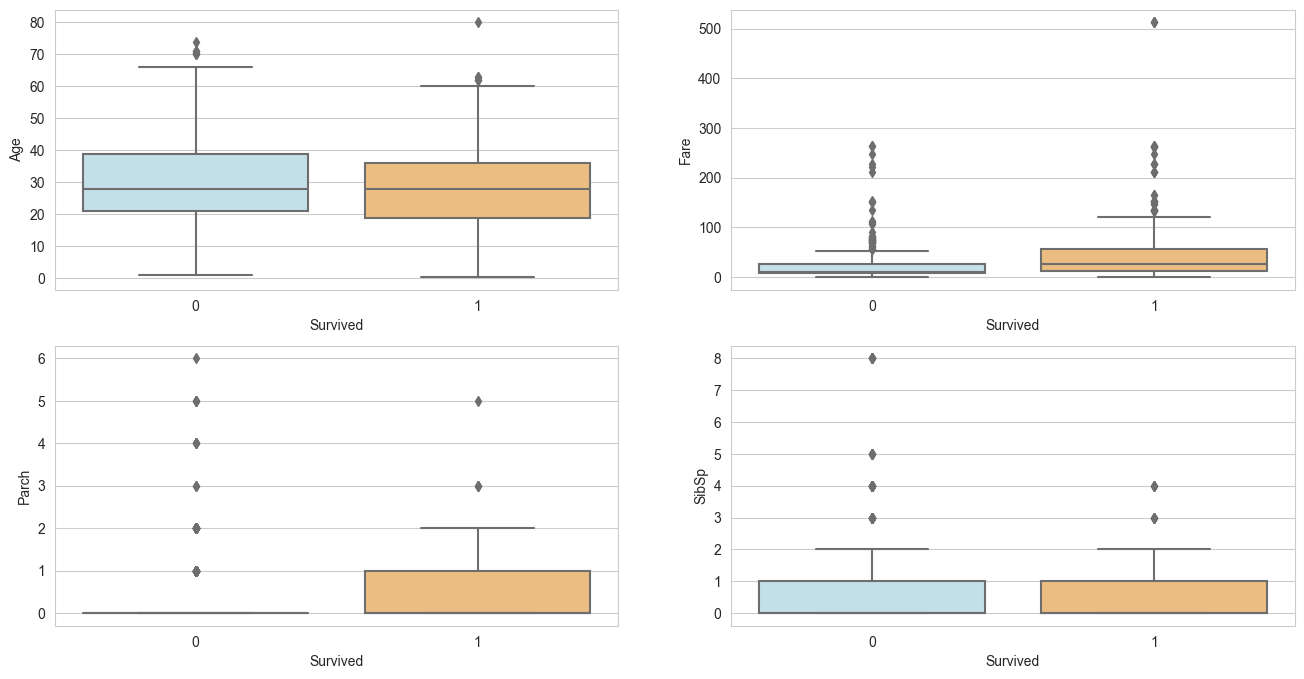

In [6]:
# Set a numerical feature list for visualization

num_list = ["Age", "Fare", "Parch", "SibSp"]

# Set suitable figure size and plot figures

fig = plt.figure(figsize = (16,8))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2,2,i + 1)
    chart = sns.boxplot(data = df_train, x = "Survived", y = column, palette = "RdYlBu_r" )

According to above charts, 'Fare' has distinct difference between 'Survived' or not. However, the distribution of 'Age' is not so obvioius as it should be in our common sence. This might influenced by other important features, like 'Sex' and 'Pclass'.  

For 'Parch' and 'Sibsp', the information expressed in charts are very vague. This can be put into the next analysis of categorical data and used other drawing methods to take a further look.

Why use Boxplot?  
Box plots divide the data into sections that each contain approximately 25% of the data in that set. Box plots are useful as they provide a visual summary of the data enabling researchers to quickly identify mean values, the dispersion of the data set, and signs of skewness.    


## 2.2 Explore categorical data

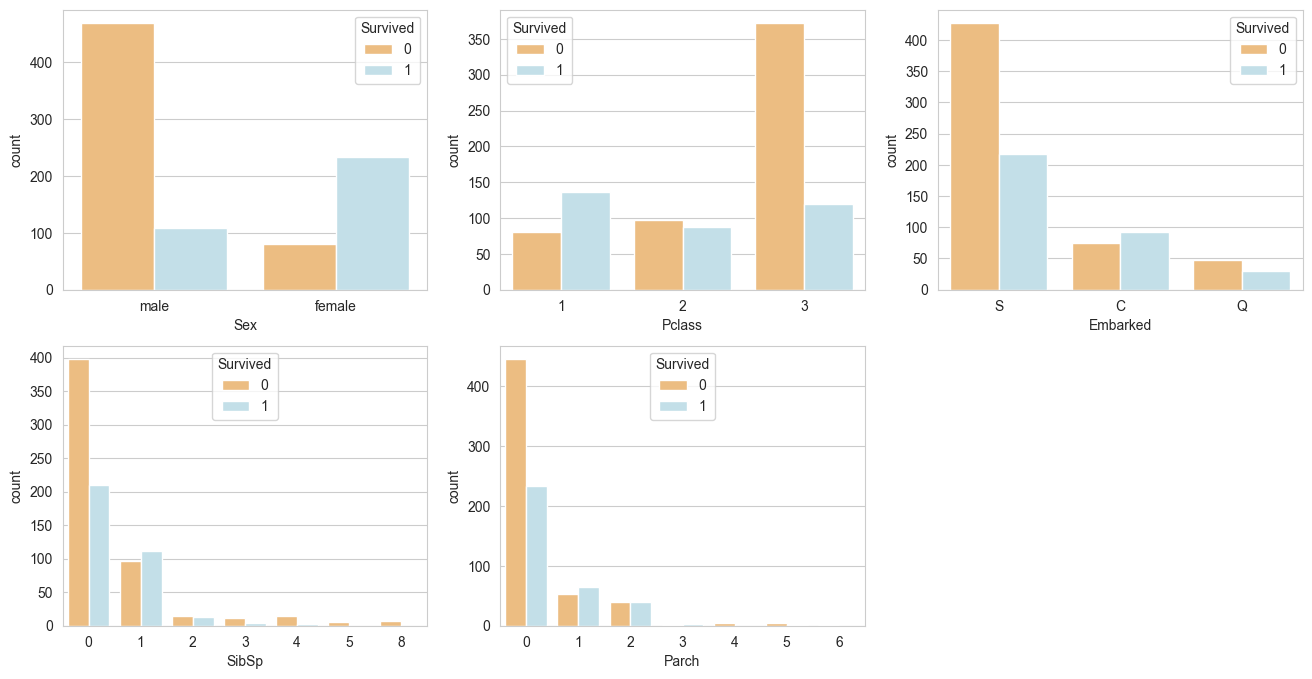

In [7]:
# Set a categorical feature list for visualization

cat_list = ['Sex','Pclass','Embarked','SibSp','Parch']

# Set suitable figure size and plot figures

fig = plt.figure(figsize = (16,8))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2,3,i + 1)
    chart = sns.countplot(data = df_train, x = column, hue = "Survived", palette = "RdYlBu" )


According to above charts, all the features are important because the height difference between the blue column (Survived) and the red (Dead) is obvious.  

Whereas, 'SibSp' and 'Parch' belong to the category of relatives, these two feature might be further processed.

## 2.3 Detailed visualization for Age

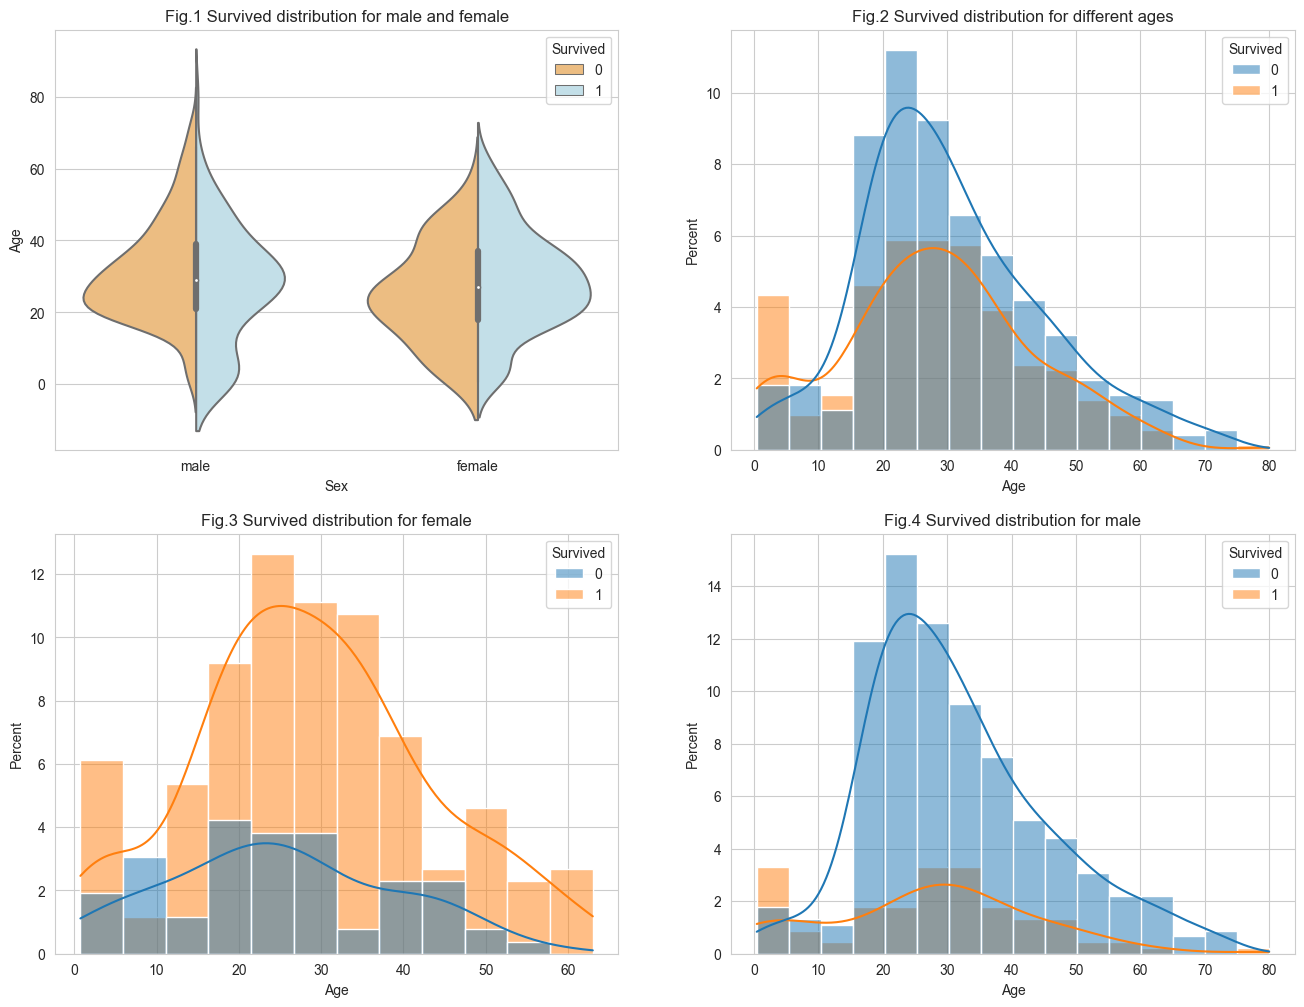

In [8]:
fig = plt.figure(figsize = (16,12))

# chart 1: survived distribution for male and female

sub = fig.add_subplot(2,2,1)
chart = sns.violinplot(data=df_train, x="Sex", y="Age", 
                       hue="Survived", palette = "RdYlBu",
                       split=True).set(title='Fig.1 Survived distribution for male and female')

# chart 2: survived distribution for all ages

sub = fig.add_subplot(2,2,2)
chart = sns.histplot(data=df_train, x="Age", 
                     hue="Survived",kde=True, 
                     bins=16,stat='percent').set(title='Fig.2 Survived distribution for different ages')

# chart 3: survived distribution for female

sub = fig.add_subplot(2,2,3)
chart = sns.histplot(data=df_train[df_train["Sex"]=="female"], 
                     x="Age", hue="Survived",
                     kde=True, bins=12,
                     stat='percent').set(title='Fig.3 Survived distribution for female')

# chart 4: survived distribution for male

sub = fig.add_subplot(2,2,4)
chart = sns.histplot(data=df_train[df_train["Sex"]=="male"], x="Age", 
                     hue="Survived",kde=True, 
                     bins=16, stat='percent').set(title='Fig.4 Survived distribution for male')
plt.show()


**Fig.1**:
- A violin plot depicts distributions of numeric data for one or more groups using density curves. The width of each curve corresponds with the approximate frequency of data points in each region. 
- The highest dead frequency is for men around 20.
- However, it is hard to tell deeper information simply based on this violin.

**Fig.2**:
- Overall, for people's age roughly < 15, the survival rate is the highest (highest red bars).  
- People's age roughly locates in (15,30), survival rate is the lowest (highest blue bars).  

**Fig.3 & Fig.4**:
- More than half of the women survived, yet the vast majority of men died
- Survival rates vary by different age groups

**As the result**: 
- We will devide the age column into several groups in future analysis


# 3. Process text data

Take a look at text data (`Name` and `Ticket`).

In [9]:
display(df_train[['Name','Ticket']].head())
display(df_train[['Name','Ticket']].tail())

,Name,Ticket
0,"Braund, Mr. Owen Harris",A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599
2,"Heikkinen, Miss. Laina",STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803
4,"Allen, Mr. William Henry",373450


,Name,Ticket
886,"Montvila, Rev. Juozas",211536
887,"Graham, Miss. Margaret Edith",112053
888,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607
889,"Behr, Mr. Karl Howell",111369
890,"Dooley, Mr. Patrick",370376


Clearly, title is included in passengers' full name, which can be used to classify them.  
But the 'ticket' information was entered very confusingly, some have six numbers and some are letters mixed with numbers. We tend to not use this column as feature in prediction. 

## 3.1 Extract Title from Name
In the following code we extract Title using regular expressions, because title ends with a dot character within 'Name'.

In [10]:
df_train["Title"] = df_train["Name"].str.extract(r'([A-Za-z]+)\.')
df_test["Title"] = df_test["Name"].str.extract(r'([A-Za-z]+)\.')

# Check all kinds of extracted titles

print('All kinds of Title:')
display(df_train.Title.value_counts())
display('---'*10)

# check if there is missing title

print('Check missing title passengers:')
display(df_train.Title.isnull().value_counts())
display('---'*10)

All kinds of Title:


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

'------------------------------'

Check missing title passengers:


False    891
Name: Title, dtype: int64

'------------------------------'

All passengers were recorded with their title, Title feature will replace Name feature in future prediction.  

Moreover, there are some typos in the title and some low-frequent title kinds that can be classified as others to reduce the number of title types.

In [11]:
# Clean Title

data = [df_train, df_test]

for df in data:
    df['Title'] = df['Title'].replace(['Countess', 'Col', \
                                            'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Other')
    df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Capt','Sir'], 'Mr')
    df['Title'] = df['Title'].replace(['Lady','Mme'], 'Mrs')
    
# Check new classified Titles and the survival rate for each title

print('Titles in train dataframe:')
display(df_train['Title'].value_counts()) 
print('---'*30)

print('Titles in test dataframe:')
display(df_test['Title'].value_counts())
print('---'*30)

print('Survival rate for each title:')
display(df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())


Titles in train dataframe:


Mr        519
Miss      185
Mrs       127
Master     40
Other      20
Name: Title, dtype: int64

------------------------------------------------------------------------------------------
Titles in test dataframe:


Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

------------------------------------------------------------------------------------------
Survival rate for each title:


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.157996
3,Mrs,0.795276
4,Other,0.300000


Now, the Title types of two dataframes are consistent.  
The survival rate for each title changes dramatically. This new feature is important for further prediction.

# 4. Further process and fill missing values

## 4.1 Age data

In [12]:
# Check the amount of missing age

print('Train: The amount of missing age:')
display(df_train['Age'].isnull().value_counts())
print('Test: The amount of missing age:')
display(df_test['Age'].isnull().value_counts())

print('---'*30)
display(df_train['Age'].describe())
display(df_test['Age'].describe())


Train: The amount of missing age:


False    714
True     177
Name: Age, dtype: int64

Test: The amount of missing age:


False    332
True      86
Name: Age, dtype: int64

------------------------------------------------------------------------------------------


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

The age value of 177 passengers are unknown. This missing data accounts for nearly a quarter of the total.  
Since most of the machine learning models that you want to use will provide an error if you pass NaN values into it, the easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.  
As the result, these missing values shold be handled properly.   

For passengers missing age value, there are following features that are suitable for inferring their age:
- Embarked
- Title
- Pclass

The most common way to fill nan data is to use mean or median. If there is a dataset that has great outliers, replacing nan with median is better. E.x.: 99% of household income is below 100, and 1% is above 500. The above tables show that the majority of passengers are under the age of 38 and 39 for train dataset and test dataset, whereas the oldest passengers are 80 and 76 respectively. This is a kind of great outliers.   

Before fillin data with mean or median, let's check the difference between them.

In [13]:
mean_median = pd.DataFrame(columns=['Feature','train_mean','train_median','test_mean','test_median'])

feature_list = ['Title', 'Embarked', 'Pclass','Sex']

for i in feature_list:
    for j in df_train[i].unique():
        new_df = pd.DataFrame(
        {
        'Feature': [j],
        'train_mean': [format(df_train[df_train[i]==j]['Age'].mean(), '.1f')],
        'train_median': [df_train[df_train[i]==j]['Age'].median()],
        'test_mean': [format(df_test[df_test[i]==j]['Age'].mean(), '.1f')],
        'test_median': [df_test[df_test[i]==j]['Age'].median()]
        }
        )
        mean_median = pd.concat([mean_median,new_df], ignore_index=True)

mean_median['train_diff'] = mean_median['train_mean'].astype('float') - mean_median['train_median']
mean_median['test_diff'] = mean_median['test_mean'].astype('float') - mean_median['test_median']

mean_median

,Feature,train_mean,train_median,test_mean,test_median,train_diff,test_diff
0,Mr,32.5,30.0,32.0,28.5,2.5,3.5
1,Mrs,35.9,35.0,38.9,36.5,0.9,2.4
2,Miss,21.8,21.0,21.8,22.0,0.8,-0.2
3,Master,4.6,3.5,7.4,7.0,1.1,0.4
4,Other,43.9,45.0,43.8,44.0,-1.1,-0.2
5,S,29.4,28.0,28.8,26.0,1.4,2.8
6,C,30.8,29.0,34.7,35.0,1.8,-0.3
7,Q,28.1,27.0,29.3,26.5,1.1,2.8
8,NaN,nan,NaN,nan,NaN,NaN,NaN
9,3,25.1,24.0,24.0,24.0,1.1,0.0


Obviously, guessing age by Title feature is the most distinguishable, and there is no big difference between mean and median.
Moreover, the amount of missing age value is quite big, using mean values based on Pclass x Title combinations are more suitable.

### 😆 Fill missing age

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
guess_ages = np.zeros((5,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
Title_list = df_train['Title'].unique()

for df in data:
    for i in range(len(Title_list)):
        for j in range(0, 3):
            guess_df = df[(df['Title'] == Title_list[i]) & \
                                  (df['Pclass'] == j+1)]['Age'].dropna()
            
            if len(guess_df) == 0:
                age_guess = 120 #Since there is no passenger with Other title in Pclass3, set an impossible age
            else:
                age_guess = guess_df.mean()
            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(len(Title_list)):
        for j in range(0, 3):
            df.loc[ (df['Age'].isnull()) & (df['Title'] == Title_list[i]) & (df['Pclass'] == j+1),\
                    'Age'] = guess_ages[i,j]

    df['Age'] = df['Age'].astype(int)
    
    # As we set an incridiable age for special situation, check whether we write this age into the dataset
    print(df['Age'].describe())


count    891.000000
mean      29.327722
std       13.568731
min        0.000000
25%       21.000000
50%       28.000000
75%       36.500000
max       80.000000
Name: Age, dtype: float64
count    418.000000
mean      29.555024
std       13.144213
min        0.000000
25%       21.250000
50%       27.000000
75%       36.000000
max       76.000000
Name: Age, dtype: float64


### 😆 Age further process
When different features have different ranges, gradient descent can "bounce" and slow down convergence. Grouping this kind of numerical data can mitigate this problem.

(16.0, 32.0]     441
(32.0, 48.0]     233
(-0.08, 16.0]    137
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeRange, dtype: int64

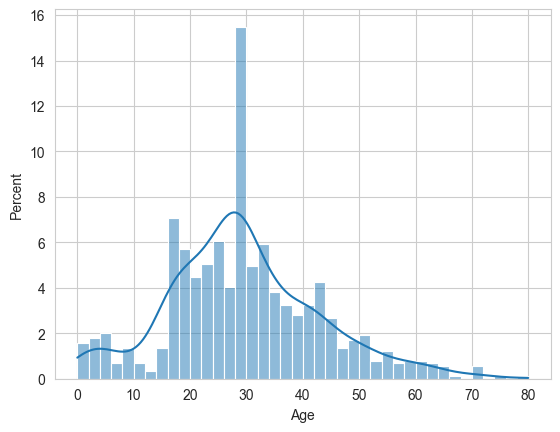

In [17]:
# Check Age distribution and group age data

chart = sns.histplot(data=df_train, 
                     x="Age", 
                     kde=True, bins=40,
                     stat='percent')

df_train["AgeRange"] = pd.cut(df_train['Age'], bins=5)
df_train["AgeRange"].value_counts()

In [18]:
for df in data:
    df.loc[df['Age']<=16, 'AgeGroup'] = 'Children'
    df.loc[(df['Age']>16) & (df['Age']<=32), 'AgeGroup'] = 'Young'
    df.loc[(df['Age']>32) & (df['Age']<=48), 'AgeGroup'] = 'Adult'
    df.loc[(df['Age']>48) & (df['Age']<=64), 'AgeGroup'] = 'Middle'
    df.loc[(df['Age']>64) & (df['Age']<=80), 'AgeGroup'] = 'Elder'

# Check if there is a significant difference in survival between groups, 
# If not, grouping may not have had a positive effect for future prediction.

df_train[['AgeGroup','Survived']].groupby(['AgeGroup'],as_index=False)['Survived'].mean().sort_values(by='AgeGroup',ascending=False)


,AgeGroup,Survived
4,Young,0.315193
3,Middle,0.434783
2,Elder,0.090909
1,Children,0.554745
0,Adult,0.412017


## 4.2 Embarked data
Check passenger's information who without embarked data.

In [19]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.0,NaN,Miss,"(32.0, 48.0]",Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.0,NaN,Mrs,"(48.0, 64.0]",Middle


Both passengers are female and in first Pclass with a ticket fare of 80 pounds. Through the following analysis, guess where did they embark Titanic.

In [20]:
display(df_train[(df_train['Sex']=='female') & (df_train['Pclass']==1)].groupby(['Sex','Pclass','Embarked'])['Fare'].mean())
print('---'*30)
display(df_train[df_train['Pclass']==1].groupby(['Pclass'])['Embarked'].value_counts())

Sex     Pclass  Embarked
female  1       C           115.640309
                Q            90.000000
                S            99.026910
Name: Fare, dtype: float64

------------------------------------------------------------------------------------------


Pclass  Embarked
1       S           127
        C            85
        Q             2
Name: Embarked, dtype: int64

They were likely on board in Q nad S. However, only one person boarded in Q, these two lady were most likely boarded Titanic in Southampton.   
(If you search their names on the Internet, they did boarded in Southampton)

In [21]:
# Fill missing Embarked with Southampton

df_train['Embarked'].fillna('S',inplace=True)

## 4.3 Fare data
### 😆 Fill missing fare
As we already know there is one passenger missing fare value in test dataset in #1 analysis.   
Check his information.

In [22]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup
152,1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,S,Mr,Middle


Find the average fare for the same kind passenger as Storey Thomas in train dataset.   
(Pclass 3, male, embarked in Southampton, no SibSp and no Parch)

In [23]:
print('Average fare for this kind of passenger in train dataset:')
display(df_train[(df_train['Pclass']==3) & (df_train['Sex']=='male') & (df_train['Embarked']=='S') & \
        (df_train['SibSp']==0) & (df_train['Parch']==0)].groupby('AgeGroup')['Fare'].mean())
print('---'*30)
print('Average fare for this kind of passenger in test dataset:')
df_test[(df_test['Pclass']==3) & (df_test['Sex']=='male') & (df_test['Embarked']=='S') & \
        (df_test['SibSp']==0) & (df_test['Parch']==0)].groupby('AgeGroup')['Fare'].mean()

Average fare for this kind of passenger in train dataset:


AgeGroup
Adult        8.063806
Children     8.518340
Elder        7.775000
Middle       6.555213
Young       10.503368
Name: Fare, dtype: float64

------------------------------------------------------------------------------------------
Average fare for this kind of passenger in test dataset:


AgeGroup
Adult       8.738422
Children    9.225000
Middle           NaN
Young       9.144420
Name: Fare, dtype: float64

In [24]:
# Fill Storey Thomas's fare with train dataset's mean

df_test['Fare'].fillna(df_train[(df_train['Pclass']==3) & 
                                (df_train['Sex']=='male') & (df_train['Embarked']=='S') &
                                (df_train['SibSp']==0) & (df_train['Parch']==0) & 
                                (df_train['AgeGroup']=='Middle')]['Fare'].mean(), inplace=True)

### 😆 Fare further process
Check Fare feature distribution.

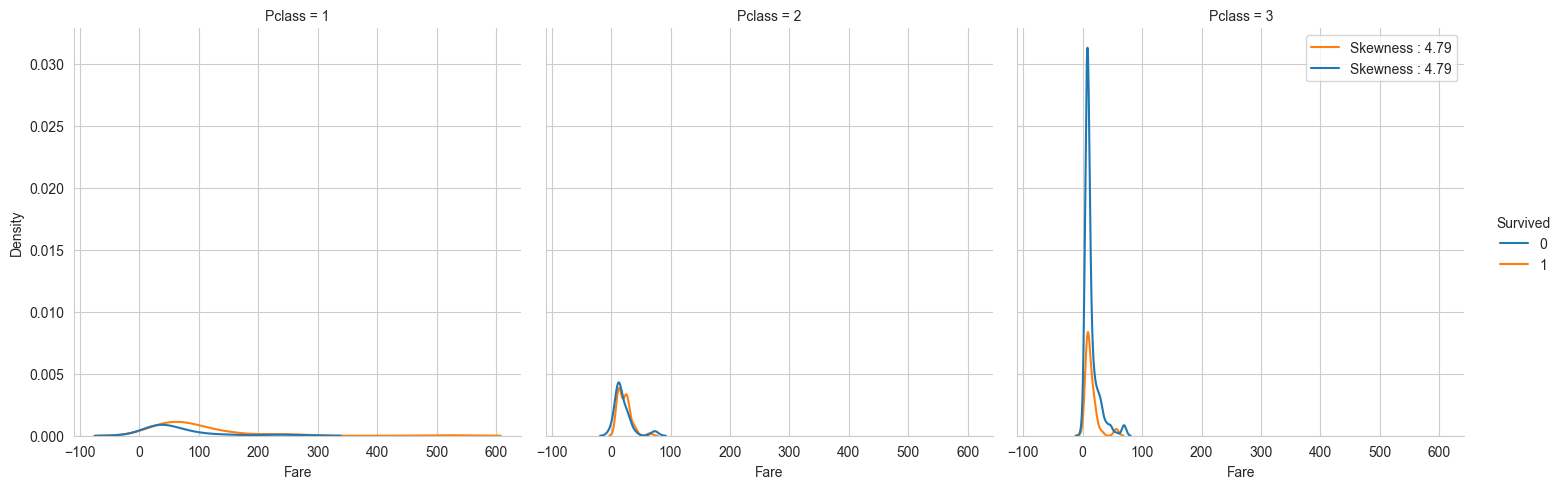

In [25]:
chart = sns.displot(data=df_train, x="Fare", kind="kde", 
                    hue='Survived', col='Pclass',
                    label="Skewness : %.2f"%(df_train["Fare"].skew()))
plt.legend(loc="best")

As we can see, Fare distribution is very skewed. This can lead to overweigth high values in modelling, even if it is scaled.
Therefore, grouping fare feature based on quantiles to discretize variable into equal-sized buckets.   
Furthemore, check if there is a significant difference in survival between groups, if not, grouping may not have had a positive effect for future prediction.

In [26]:
# Cut data into equal-sized buckets

df_train["FareRange"] = pd.qcut(df_train['Fare'],4)

# Check survival rate for all groups

df_train[['FareRange','Survived']]\
        .groupby(['FareRange'],as_index=False)['Survived'].mean()\
        .sort_values(by='FareRange',ascending=False)

,FareRange,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


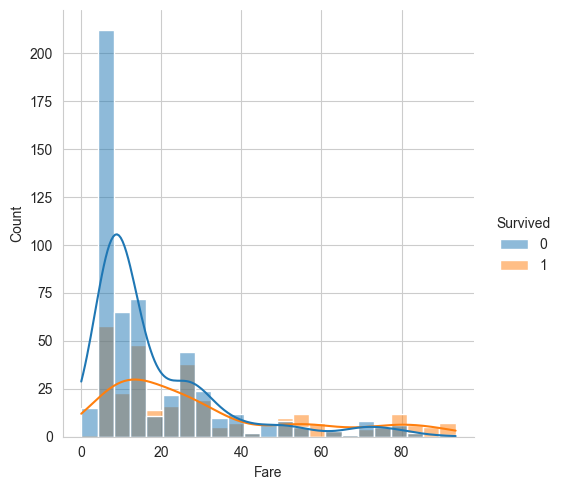

In [27]:
# Check more specific fare range (0-100) to see whether the FareRange is reasonable.

sns.displot(data=df_train[df_train['Fare']<100], x="Fare", kind="hist",kde=True, hue='Survived')

However, after qcut processing, the distribution of Fare is still uneven. 
For example, the survival probability of passengers with more than 50 is much higher than that of 30-50, but they are in the same fare group after qcut.

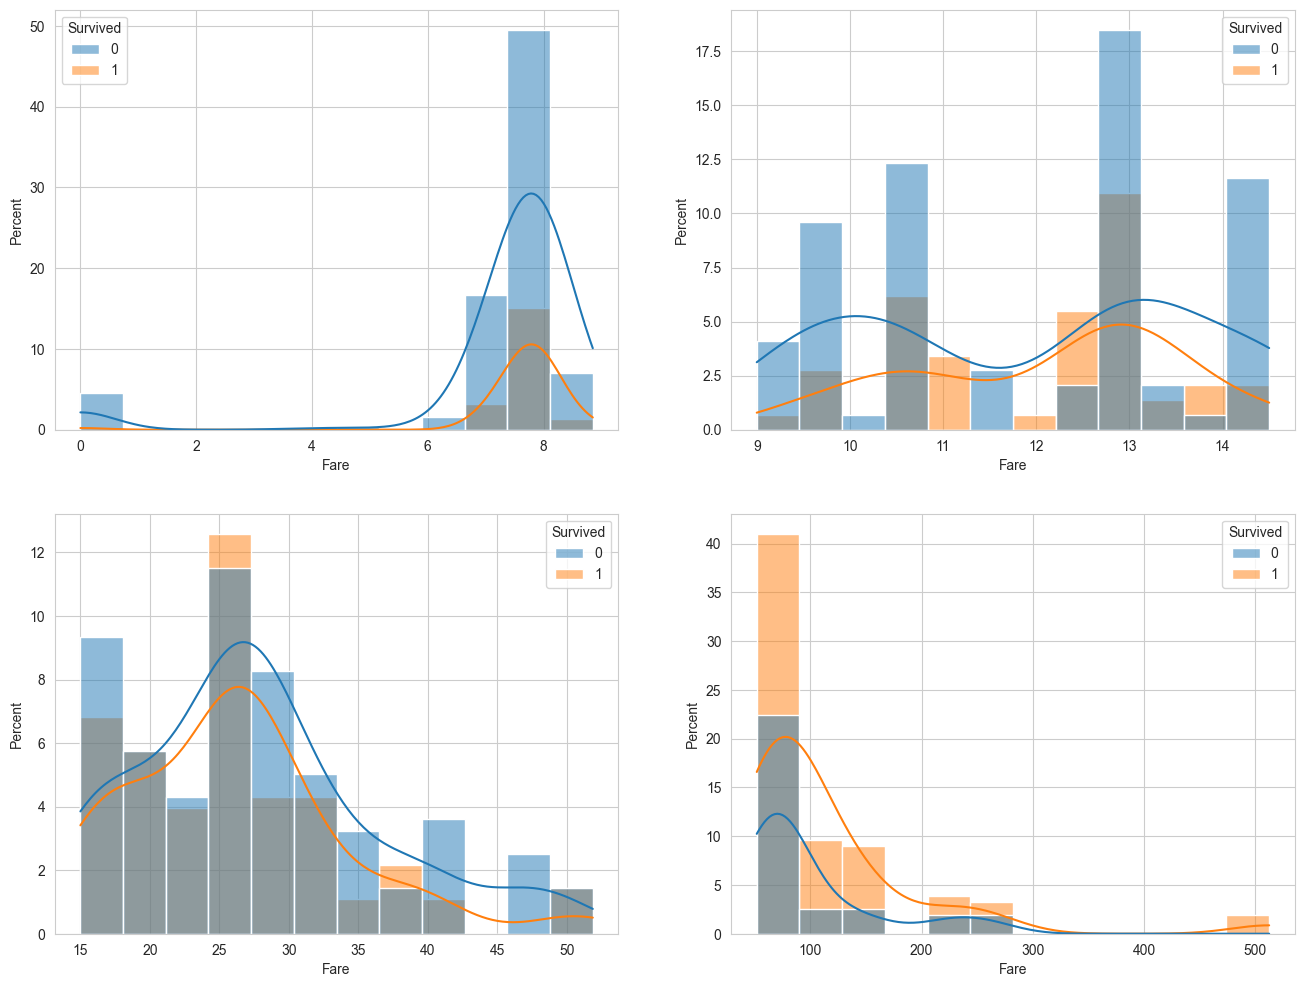

In [28]:
# Manually adjust the boundaries for FareRange

fig = plt.figure(figsize = (16,12))

# chart: survived distribution for different fare groups

sub = fig.add_subplot(2,2,1)
chart = sns.histplot(data=df_train[df_train['Fare']<9], x="Fare", 
                     hue="Survived",kde=True, bins=12,stat='percent')

sub = fig.add_subplot(2,2,2)
chart = sns.histplot(data=df_train[(df_train["Fare"]>=9) & 
                                   (df_train['Fare']<15)], x="Fare", 
                     hue="Survived",kde=True, bins=12,stat='percent')

sub = fig.add_subplot(2,2,3)
chart = sns.histplot(data=df_train[(df_train["Fare"]>=15) & 
                                   (df_train['Fare']<52)], x="Fare", 
                     hue="Survived",kde=True, bins=12,stat='percent')

sub = fig.add_subplot(2,2,4)
chart = sns.histplot(data=df_train[df_train["Fare"]>=52], x="Fare", 
                     hue="Survived",kde=True, bins=12,stat='percent')
plt.show()


The survival situation of each FareRange after manual adjustment is more balanced.   
Then group Fare data based on FareRange, and check whether the survival rate for each group has been improved.

In [29]:
# Group Fare data

for df in data:
    df.loc[df['Fare']<9, 'FareGroup'] = 'A'
    df.loc[(df['Fare']>=9) & (df['Fare']<15), 'FareGroup'] = 'B'
    df.loc[(df['Fare']>=15) & (df['Fare']<52), 'FareGroup'] = 'C'
    df.loc[df['Fare']>=52, 'FareGroup'] = 'D'
    
display(df_train[['FareGroup','Survived']]\
        .groupby(['FareGroup'],as_index=False)['Survived'].mean()\
        .sort_values(by='FareGroup',ascending=False))

,FareGroup,Survived
3,D,0.685897
2,C,0.435252
1,B,0.356164
0,A,0.199357


## 4.4 Family data analysis
From EDA in #2, the survival rate for passengers travelling alone is lower than with family. In the meantime, some big family boarded Titanic with more than 5 family menbers.

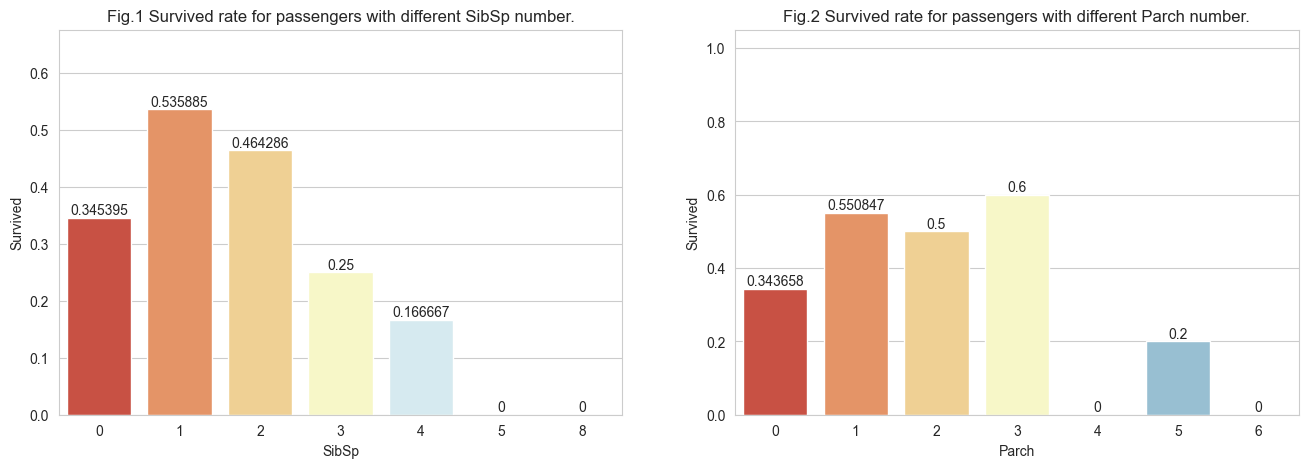

In [30]:
# check the survival rate for different family sizes

fig = plt.figure(figsize = (16,5))

sub = fig.add_subplot(1,2,1)
chart = sns.barplot(x="SibSp",y="Survived",data = df_train, errwidth=0,
                    palette = "RdYlBu")
chart.bar_label(chart.containers[0])
chart.set_title('Fig.1 Survived rate for passengers with different SibSp number.')

sub = fig.add_subplot(1,2,2)
chart = sns.barplot(x="Parch",y="Survived",data = df_train, errwidth=0,
                    palette = "RdYlBu")
chart.bar_label(chart.containers[0])
chart.set_title('Fig.2 Survived rate for passengers with different Parch number.')

plt.show()

The above figures seem that passengers with SibSp=1/2 and Parch=1/2/3 have higher survival rate than others. We speculate passengers travel with small family size have higher survival rate than who travelling alone or with a big family.

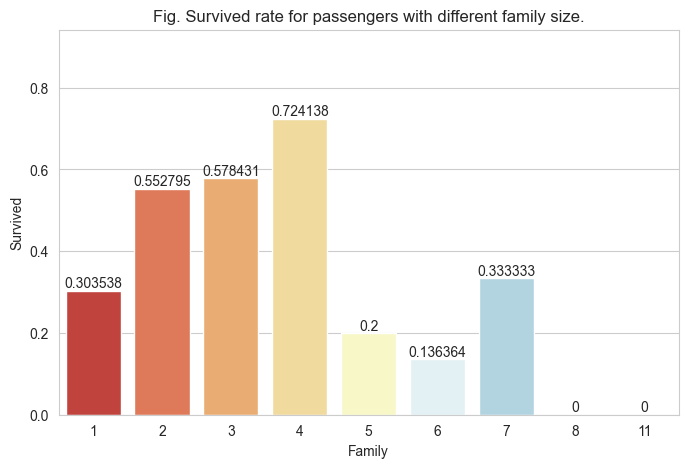

In [31]:
# check if there is passenger's SibSp>=2 and Parch>=2

for df in data:
    df['Family'] = df['SibSp'] + df['Parch'] +1

fig = plt.figure(figsize = (8,5))

chart = sns.barplot(x="Family",y="Survived",data = df_train, errwidth=0,
                    palette = "RdYlBu")
chart.bar_label(chart.containers[0])
chart.set_title('Fig. Survived rate for passengers with different family size.')

plt.show()


Passengers travelled with small family (2/3/4) have higher survival rate.   
Next, access more detailed information for this kind of family.


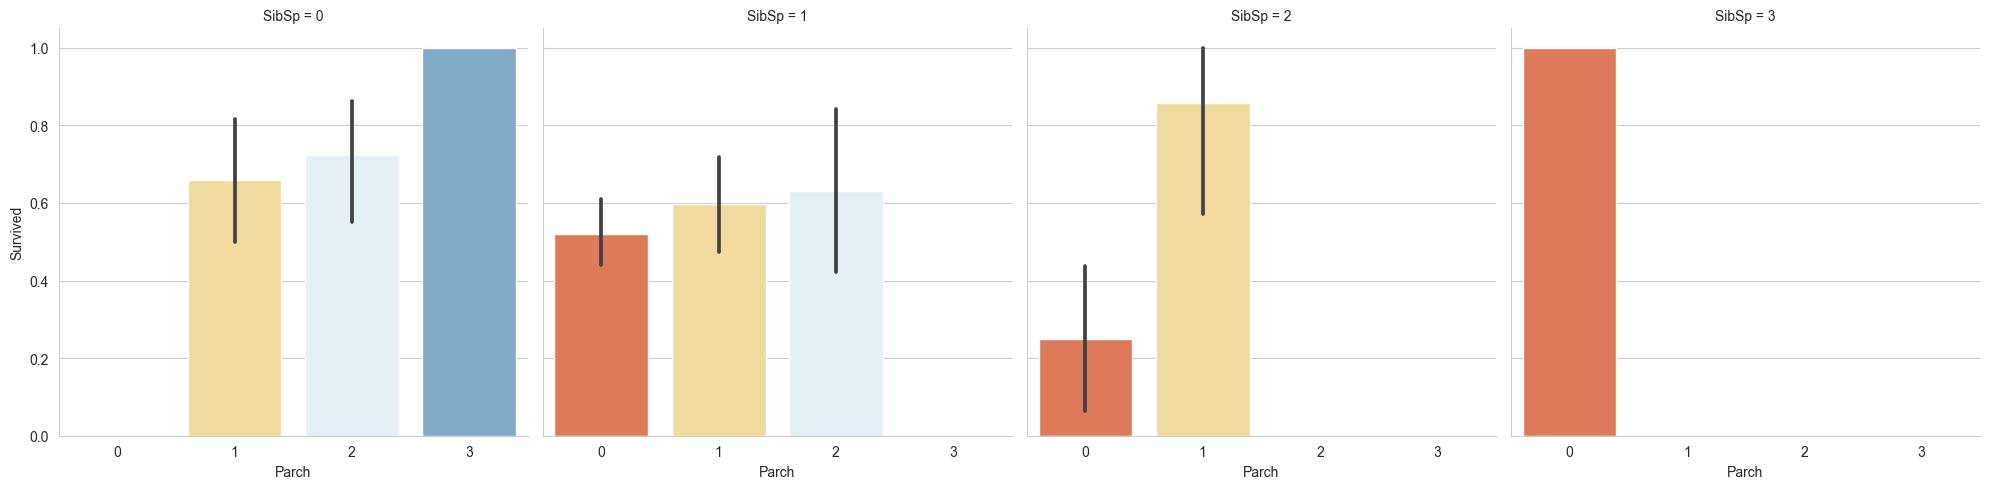

In [32]:
sns.catplot(data=df_train[(df_train['Family']>1) & (df_train['Family']<5)], 
            x='Parch', y='Survived', col='SibSp', kind='bar',palette = "RdYlBu")

In [33]:
df_train[(df_train['SibSp']==2) & (df_train['Parch']==0)].groupby('Sex')['Survived'].mean()

Sex
female    0.666667
male      0.153846
Name: Survived, dtype: float64

The surprisingly low survival rate for SibSp=1 & Parch =0 seems due to sex.   
From this point of view, it is very suitable to divide family groups according to large, medium and small.

In [34]:
# Group Family data

for df in data:
    df.loc[df['Family']<=1, 'FamilySize'] = 'Alone'
    df.loc[(df['Family']>1) & (df['Family']<=4), 'FamilySize'] = 'Small'
    df.loc[(df['Family']>4) , 'FamilySize'] = 'Large'
   

# 5. Drop useless column  
## 5.1 Train data drop

In [35]:
# Check current columns

df_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,AgeGroup,FareRange,FareGroup,Family,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,"(16.0, 32.0]",Young,"(-0.001, 7.91]",A,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,"(32.0, 48.0]",Adult,"(31.0, 512.329]",D,2,Small


In [36]:
drop_train_list = ['PassengerId', 'Age', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'AgeRange', 'FareRange', 'Family']
df_train = df_train.drop(drop_train_list, axis=1)

# Check dropped dataset

display(df_train.head(2))

,Survived,Pclass,Sex,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,0,3,male,S,Mr,Young,A,Small
1,1,1,female,C,Mrs,Adult,D,Small


## 5.2 Test data drop

In [37]:
# Check current columns

df_test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup,FareGroup,Family,FamilySize
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,Mr,Adult,A,1,Alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,Mrs,Adult,A,2,Small


In [38]:
# PassengerId need to concat with predicted survived situation in the final step, 
# We will keep it in the test dataset

drop_test_list = ['Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Family']
df_test = df_test.drop(drop_test_list, axis=1)

# Check dropped dataset

df_test.head(2)

,PassengerId,Pclass,Sex,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,892,3,male,Q,Mr,Adult,A,Alone
1,893,3,female,S,Mrs,Adult,A,Small


# 6. Create Dummies for specific column
Dummy variables are widely used in Data Science and Machine Learning due to the qualitative nature of dependent and independent variables. Qualitative includes categorical variables which mean variables can be classified into different categories.

In [39]:
df_train.loc[df_train['Sex']=='female', 'Sex'] = 1
df_train.loc[df_train['Sex']=='male', 'Sex'] = 0

df_test.loc[df_test['Sex']=='female', 'Sex'] = 1
df_test.loc[df_test['Sex']=='male', 'Sex'] = 0

In [40]:
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,0,3,0,S,Mr,Young,A,Small
1,1,1,1,C,Mrs,Adult,D,Small
2,1,3,1,S,Miss,Young,A,Alone
3,1,1,1,S,Mrs,Adult,D,Small
4,0,3,0,S,Mr,Adult,A,Alone


In [41]:
dummy_columns = ['Embarked','Title','AgeGroup','FareGroup','FamilySize']

df_train_dummies = pd.get_dummies(data = df_train, columns = dummy_columns)
df_test_dummies = pd.get_dummies(data = df_test, columns = dummy_columns)


In [42]:
display(df_train_dummies.head(2))
display(df_test_dummies.head(2))
display(df_train_dummies.shape, df_test_dummies.shape)

,Survived,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,AgeGroup_Elder,AgeGroup_Middle,AgeGroup_Young,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FamilySize_Alone,FamilySize_Large,FamilySize_Small
0,0,3,0,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,0,0,1
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1


,PassengerId,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,AgeGroup_Elder,AgeGroup_Middle,AgeGroup_Young,FareGroup_A,FareGroup_B,FareGroup_C,FareGroup_D,FamilySize_Alone,FamilySize_Large,FamilySize_Small
0,892,3,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,893,3,1,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


(891, 23)

(418, 23)

# 7. Modelling

In [43]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold, learning_curve

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm

In [44]:
# split data for training and testing

y_train = df_train_dummies['Survived']
X_train = df_train_dummies.drop('Survived', axis=1)
X_test = df_test_dummies.drop('PassengerId', axis=1)

y_train.shape, X_train.shape, X_test.shape

((891,), (891, 22), (418, 22))

## 7.1 Simple modelling
Meta modelling with AdaBoostClassifier and VotingClassifier will be used later.

100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.41it/s]


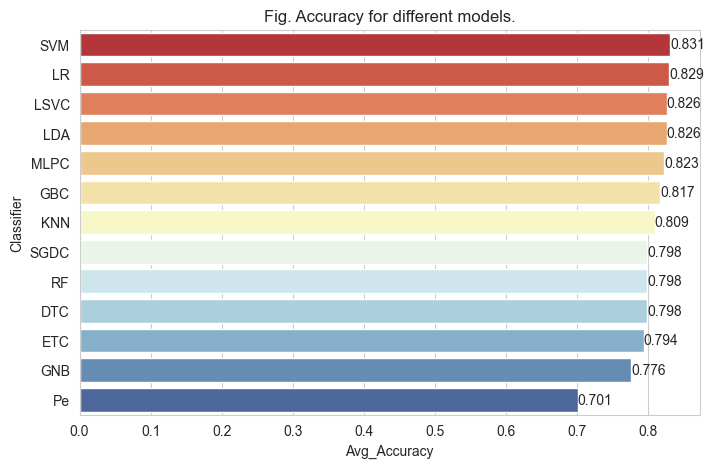

In [45]:
# Cross validate model with Kfold stratified cross val

kfold = StratifiedKFold(n_splits=10)

random_state = 2

classifiers = {
    "RF": RandomForestClassifier(random_state=random_state),
    "GBC": GradientBoostingClassifier(random_state=random_state),
    "ETC":ExtraTreesClassifier(random_state=random_state),
    "LDA": LinearDiscriminantAnalysis(),
    "LR": LogisticRegression(), 
    "Pe": Perceptron(random_state=random_state), # supervised learning of binary classifiers
    "SGDC": SGDClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier(), 
    "DTC": DecisionTreeClassifier(random_state=random_state),
    "MLPC": MLPClassifier(),
    "SVM": SVC(random_state=random_state), # supervised learning of binary classifiers 
    "LSVC": LinearSVC(random_state=random_state),
    "GNB": GaussianNB()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy"])
for name, clf in tqdm(classifiers.items()):
    model = clf
    cv_results = cross_validate(
        model, X_train, y_train, cv=kfold,
        scoring=(['accuracy', 'f1'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
    }, ignore_index=True)
    
results = results.sort_values("Avg_Accuracy", ascending=False)

fig = plt.figure(figsize = (8,5))
chart = sns.barplot(x="Avg_Accuracy",y="Classifier",data = results, palette = "RdYlBu")
chart.bar_label(chart.containers[0],fmt='%.3f')
chart.set_title('Fig. Accuracy for different models.')

plt.show()

## 7.2 Tune models
We will choose the top 6 models to tune parameters.  

**This part will take a SUPER long time!!!!!!**  

Be careful, it takes me about half an hour.

### 😆 MLPC model tuning

In [46]:
MLPC = MLPClassifier()
MLPC_parameters = {'hidden_layer_sizes': [(10,),(20,),(30,)],
                   'activation': ['tanh', 'relu'],
                   'learning_rate': ['constant','adaptive']}

MLPC_grid = GridSearchCV(MLPC, MLPC_parameters, 
                         refit=True, scoring="accuracy", verbose=1, cv=kfold)
MLPC_grid.fit(X_train,y_train)

MLPC_best = MLPC_grid.best_estimator_

print(MLPC_grid.best_score_,MLPC_grid.best_estimator_)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.8249438202247191 MLPClassifier(hidden_layer_sizes=(10,))


### 😆 SVM model tuning

In [47]:
SVM = SVC(probability=True)
SVM_parameters = {'kernel': ['rbf'], 
                  'C': [0.01,0.1,1], 
                  'gamma': [0.01,0.1,1],
                  'random_state': [0,2,42]}

SVM_grid = GridSearchCV(SVM, SVM_parameters, 
                        refit=True, scoring="accuracy", verbose=1, cv=kfold)
SVM_grid.fit(X_train,y_train)

SVM_best = SVM_grid.best_estimator_

print(SVM_grid.best_score_,SVM_grid.best_estimator_)


Fitting 10 folds for each of 27 candidates, totalling 270 fits
0.8305243445692885 SVC(C=1, gamma=0.1, probability=True, random_state=0)


### 😆 GBC model tuning

In [48]:
GBC = GradientBoostingClassifier()
GBC_parameters = {'n_estimators':[5,10,50],
                  'learning_rate':[0.01,0.1,1],
                  'random_state': [0,1,2,3]}

GBC_grid = GridSearchCV(GBC, GBC_parameters, 
                        refit=True, scoring="accuracy", verbose=1, cv=kfold)
GBC_grid.fit(X_train,y_train)

GBC_best = GBC_grid.best_estimator_

print(GBC_grid.best_score_, GBC_grid.best_estimator_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
0.8361423220973782 GradientBoostingClassifier(n_estimators=10, random_state=0)


### 😆 LR model tuning

In [49]:
LR = LogisticRegression()
LR_parameters = {'solver':['newton-cg','lbfgs','liblinear'],
              'C':[0.001,0.01,0.1,1,10]}

LR_grid = GridSearchCV(LR, LR_parameters, 
                       refit=True, scoring="accuracy", verbose=1, cv=kfold)
LR_grid.fit(X_train,y_train)

LR_best = LR_grid.best_estimator_

print(LR_grid.best_score_, LR_grid.best_estimator_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
0.8294257178526842 LogisticRegression(C=1, solver='newton-cg')


### 😆 LDA model tuning

In [50]:
LDA = LinearDiscriminantAnalysis()
LDA_parameters = {'solver': ['svd', 'lsqr', 'eigen']}

LDA_grid = GridSearchCV(LDA, LDA_parameters, 
                        refit=True, scoring="accuracy", verbose=1, cv=kfold)
LDA_grid.fit(X_train,y_train)

LDA_best = LDA_grid.best_estimator_

print(LDA_grid.best_score_,LDA_grid.best_estimator_)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
0.8282771535580524 LinearDiscriminantAnalysis(solver='lsqr')


## 7.2 Meta modelling with AdaBoostClassifier
### 😆 DTC base

In [51]:
# Best base estimetor for Ada is Decision tree

DTC = DecisionTreeClassifier()

ABC_dct = AdaBoostClassifier(base_estimator = DTC)
ABC_dct_param = {"base_estimator__splitter": ["best", "random"],
                 "base_estimator__max_depth": [1,3,5],
                 "n_estimators" : [5,10,50],
                 "learning_rate": [0.01,0.1,1]}
    
ABC_dtc_grid = GridSearchCV(ABC_dct,param_grid = ABC_dct_param, 
                            refit= True, scoring="accuracy", verbose = 1, cv=kfold)
ABC_dtc_grid.fit(X_train,y_train)

print(ABC_dtc_grid.best_score_, ABC_dtc_grid.best_estimator_)

Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8350187265917602 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.1, n_estimators=5)


### 😆 GBC base

In [52]:
# AdaBoostClassifier (base estimetor is GBC)

ABC_gbc_param = {'n_estimators':[5,10,50],
                 'learning_rate':[0.01,0.1,1]}

ABC_gbc = AdaBoostClassifier(base_estimator = GBC_best)
ABC_gbc_grid = GridSearchCV(ABC_gbc, ABC_gbc_param, 
                            refit=True, scoring="accuracy", verbose=1, cv=kfold)
ABC_gbc_grid.fit(X_train,y_train)

print(ABC_gbc_grid.best_score_, ABC_gbc_grid.best_estimator_)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
0.8361423220973782 AdaBoostClassifier(base_estimator=GradientBoostingClassifier(n_estimators=10,
                                                             random_state=0),
                   learning_rate=0.01, n_estimators=5)


AdaBoost is tree based model. According to the above results, the fittest base estimator for Ada is GBC (best score: 0.836)
Set GBC as base estimator for Ada best model

In [53]:
Ada_best = AdaBoostClassifier(base_estimator=GradientBoostingClassifier(n_estimators=10,
                                    random_state=0),learning_rate=0.01, n_estimators=5)

## 7.3 Learning Curve plot

100%|█████████████████████████████████████████████| 6/6 [00:12<00:00,  2.04s/it]


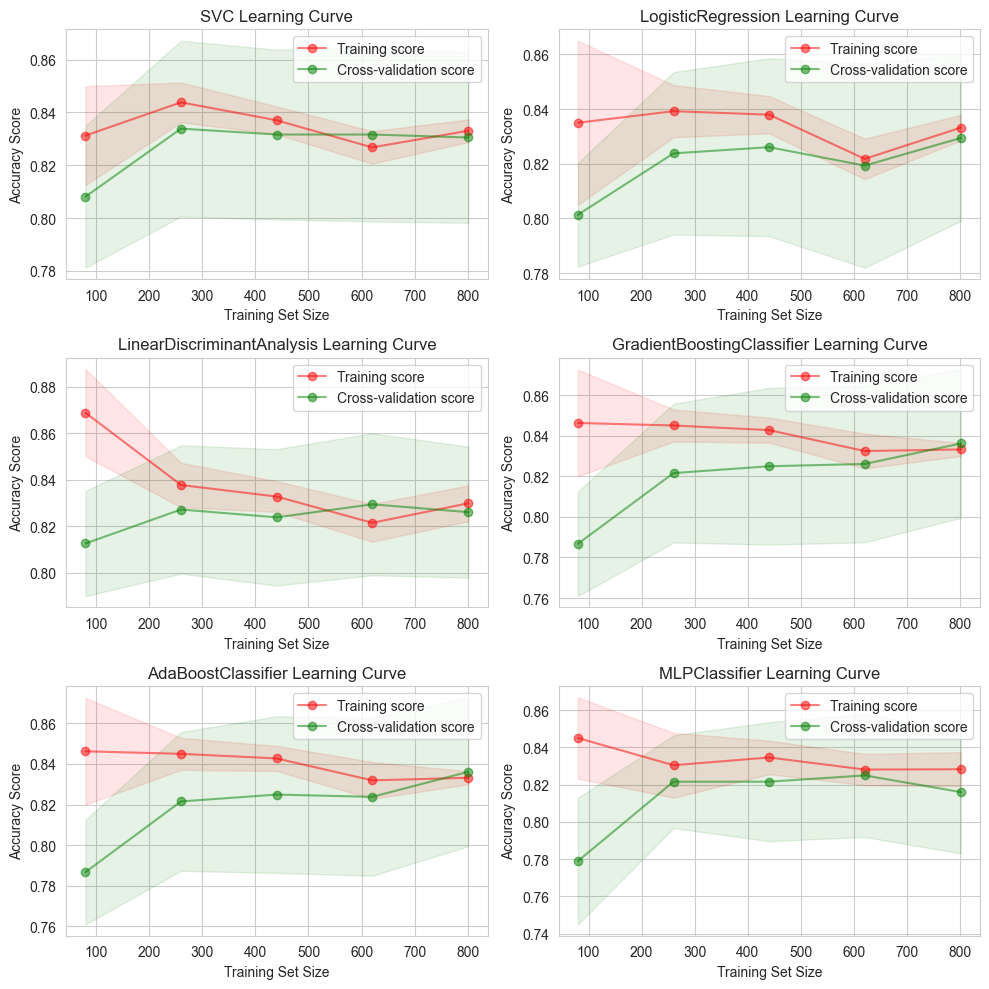

In [54]:
Best_models = {"SVC": SVM_best,
               "LogisticRegression": LR_best, 
               "LinearDiscriminantAnalysis":LDA_best, 
               "GradientBoostingClassifier": GBC_best,
               "AdaBoostClassifier": Ada_best,
               "MLPClassifier": MLPC_best}

fig = plt.figure(figsize = (10,10))
i = 1

for name, est in tqdm(Best_models.items()):
    
    train_sizes, train_scores, test_scores = learning_curve(est, X_train,y_train, cv=10, scoring='accuracy', 
                                                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
                                                        )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    sub = fig.add_subplot(3,2,i)
    plt.plot(train_sizes, train_mean, 'o-', color='r', alpha=0.5, label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color='g', alpha=0.5, label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
    plt.title(name + " Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    #plt.ylim([0.72, 0.9])
    i = i+1


LDA, GBC and ABC seem to better generalize the prediction since the training and cross-validation curves are close together.   
SVC and LR tend to overfit the training set. One way to improve the overfitting model is to feed it more training data until the validation error reaches the training error.

# 8. Combine models with VotingClassifier and prediction
The Voting classifier estimator built by combining different classification models turns out to be stronger meta-classifier that balances out the individual classifiers’ weaknesses on a particular dataset. 

In [55]:
# VotingClassifier

Final_voting = VotingClassifier(estimators=
                           [("SVC", SVM_best),
                            ("LogisticRegression", LR_best),
                            ("GradientBoostingClassifier", GBC_best),
                            ("AdaBoostClassifier", Ada_best),
                            ("LinearDiscriminantAnalysis", LDA_best),
                            ("MLPClassifier", MLPC_best)], 
                                voting='soft', n_jobs=-1, verbose=1)
             
Final_voting = Final_voting.fit(X_train,y_train)
pred_test = Final_voting.predict(X_test)

In [56]:
ID = pd.Series(df_test_dummies['PassengerId'])
Survived = pd.Series(pred_test, name='Survived')

results = pd.concat([ID, Survived],axis=1)

results.to_csv("Titanic_prediction_YijieCao.csv",index=False)

In [57]:
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


[Voting] ....... (4 of 6) Processing AdaBoostClassifier, total=   0.3s
[Voting] ...................... (1 of 6) Processing SVC, total=   0.4s
[Voting] ....... (2 of 6) Processing LogisticRegression, total=   0.0s
[Voting]  (5 of 6) Processing LinearDiscriminantAnalysis, total=   0.0s
[Voting] ............ (6 of 6) Processing MLPClassifier, total=   0.6s
[Voting]  (3 of 6) Processing GradientBoostingClassifier, total=   0.0s


/Users/astrid_cyj/my-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid_cyj/my-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid_cyj/my-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid_cyj/my-env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/astrid_cyj/my-env/lib/pyt